

# STEP 2 - RISK FACTOR ANALYSIS AND COMBINATION

##### Created by - Sanjana Tule 
##### Date - 23/08/2021

*   Analyse different risk factors seperately
*   Correlation between different risk factors
*   Apply right weightings and created a final risk factor column



In [1]:
# !pip install osmnx
# !apt install python3-rtree

In [2]:
# import libraries
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import geopandas
import requests
import osmnx as ox
import networkx as nx
import numpy as np
import seaborn as sn
from pandas.plotting import scatter_matrix
import matplotlib

In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# STEP 1 - load the combined graph from disk
all_graph = nx.read_gpickle('/content/drive/My Drive/omdena/earthquake/1_all_graph_all_risk_added.pickle')
nodes_all,edges_all = ox.graph_to_gdfs(all_graph)

display(edges_all.head())
display(nodes_all.head())

osmid   lanes  ... width tunnel
u          v          key                                  ...             
21569692   4682380491 0    [185913115, 401489878]  [4, 5]  ...   NaN    NaN
           6784129512 0                 401489883       6  ...   NaN    NaN
           6784129514 0                 401489877       3  ...   NaN    NaN
4682380491 21569692   0    [185913115, 401489878]  [4, 5]  ...   NaN    NaN
           4682381110 0                 474236841     NaN  ...   NaN    NaN

[5 rows x 19 columns]

,y,x,highway,street_count,evacuation_flag,evacuation_name,evacuation_type,ref,geometry
osmid,,,,,,,,,
21569692,34.272295,-118.604826,traffic_signals,3,N,NA,NaN,NaN,POINT (-118.60483 34.27229)
4682380491,34.269075,-118.606130,NaN,3,N,NA,NaN,NaN,POINT (-118.60613 34.26908)
6784129512,34.272381,-118.604784,NaN,4,N,NA,NaN,NaN,POINT (-118.60478 34.27238)
6784129514,34.272341,-118.604991,NaN,4,N,NA,NaN,NaN,POINT (-118.60499 34.27234)
29409715,34.224607,-118.562311,traffic_signals,4,N,NA,NaN,NaN,POINT (-118.56231 34.22461)


VISUALISE DISTANCE RISK


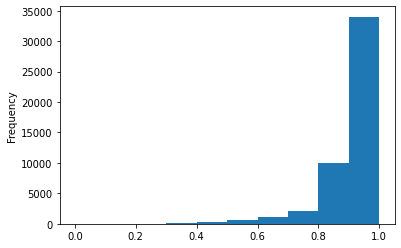

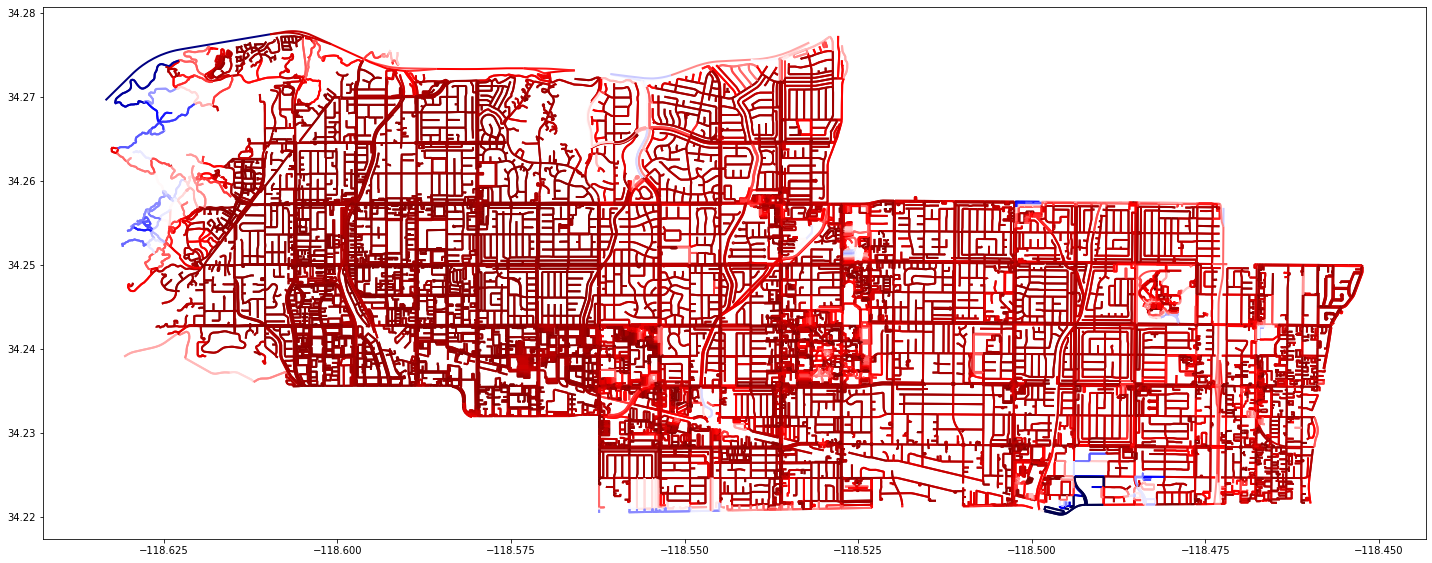

In [5]:
# STEP 2 - visualise different risk factors individually 

###  DISTANCE RISK SCORE ###

print("VISUALISE DISTANCE RISK")
edges_all['distance_risk_score'].plot.hist()

# visualising distance risk
utn = ox.settings.useful_tags_node
oxna = ox.settings.osm_xml_node_attrs
oxnt = ox.settings.osm_xml_node_tags
utw = ox.settings.useful_tags_way
oxwa = ox.settings.osm_xml_way_attrs
oxwt = ox.settings.osm_xml_way_tags
utn = list(set(utn + oxna + oxnt))
utw = list(set(utw + oxwa + oxwt))
ox.config(all_oneway=True, useful_tags_node=utn, useful_tags_way=utw)


fig, ax = plt.subplots(figsize=(20, 20))
# plot edges and nodes
edges_all.plot(ax=ax, linewidth=2, column='distance_risk_score', cmap='seismic')
sm = plt.cm.ScalarMappable(cmap='YlOrBr', norm = matplotlib.colors.Normalize(vmin=edges_all['distance_risk_score'].min(), vmax=edges_all['distance_risk_score'].max()))
sm.set_array([])
#fig.colorbar(sm, ax=ax)
#ax.set_title('Visualizing risks')
fig.tight_layout()

VISUALISE SPEED RISK


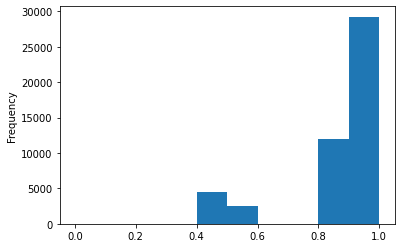

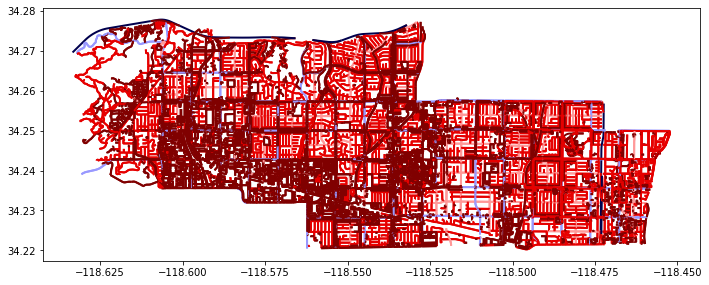

In [6]:
###  MAX SPEED RISK SCORE ###

print("VISUALISE SPEED RISK")
edges_all['max_speed_risk_score'].plot.hist()

# visualising distance risk
utn = ox.settings.useful_tags_node
oxna = ox.settings.osm_xml_node_attrs
oxnt = ox.settings.osm_xml_node_tags
utw = ox.settings.useful_tags_way
oxwa = ox.settings.osm_xml_way_attrs
oxwt = ox.settings.osm_xml_way_tags
utn = list(set(utn + oxna + oxnt))
utw = list(set(utw + oxwa + oxwt))
ox.config(all_oneway=True, useful_tags_node=utn, useful_tags_way=utw)

fig, ax = plt.subplots(figsize=(10, 20))

# plot edges and nodes
edges_all.plot(ax=ax, linewidth=2, column='max_speed_risk_score', cmap='seismic')
sm = plt.cm.ScalarMappable(cmap='seismic', norm = matplotlib.colors.Normalize(vmin=edges_all['max_speed_risk_score'].min(), vmax=edges_all['max_speed_risk_score'].max()))
sm.set_array([])
fig.tight_layout()

VISUALISE DENSITY RISK


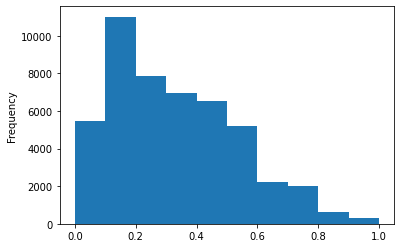

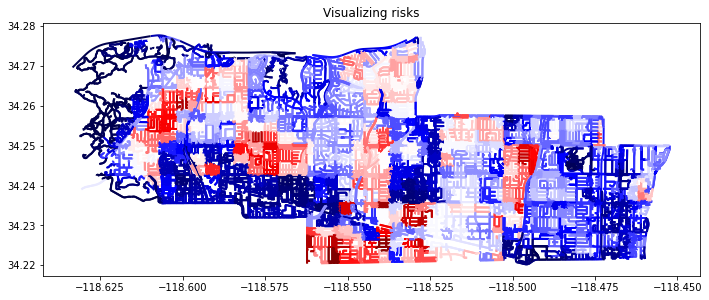

In [7]:
# STEP 2 - visualise different risk factors individually 

###  DENSITY RISK SCORE ###

print("VISUALISE DENSITY RISK")
edges_all['density_risk_score'].plot.hist()

# visualising distance risk
utn = ox.settings.useful_tags_node
oxna = ox.settings.osm_xml_node_attrs
oxnt = ox.settings.osm_xml_node_tags
utw = ox.settings.useful_tags_way
oxwa = ox.settings.osm_xml_way_attrs
oxwt = ox.settings.osm_xml_way_tags
utn = list(set(utn + oxna + oxnt))
utw = list(set(utw + oxwa + oxwt))
ox.config(all_oneway=True, useful_tags_node=utn, useful_tags_way=utw)


fig, ax = plt.subplots(figsize=(10, 20))
# plot edges and nodes
edges_all.plot(ax=ax, linewidth=2, column='density_risk_score', cmap='seismic')
sm = plt.cm.ScalarMappable(cmap='seismic', norm = matplotlib.colors.Normalize(vmin=edges_all['density_risk_score'].min(), vmax=edges_all['density_risk_score'].max()))
#sm.set_array([])
#fig.colorbar(sm, ax=ax)
ax.set_title('Visualizing risks')
fig.tight_layout()

VISUALISE WIDTH RISK


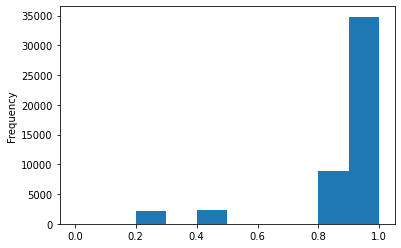

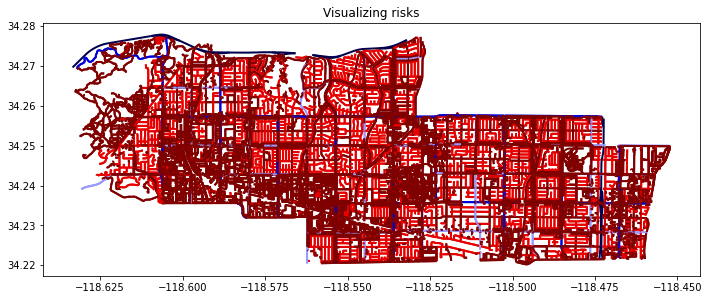

In [8]:
# STEP 2 - visualise different risk factors individually 

###  WIDTH RISK SCORE ###

print("VISUALISE WIDTH RISK")
edges_all['width_risk_score'].plot.hist()

# visualising distance risk
utn = ox.settings.useful_tags_node
oxna = ox.settings.osm_xml_node_attrs
oxnt = ox.settings.osm_xml_node_tags
utw = ox.settings.useful_tags_way
oxwa = ox.settings.osm_xml_way_attrs
oxwt = ox.settings.osm_xml_way_tags
utn = list(set(utn + oxna + oxnt))
utw = list(set(utw + oxwa + oxwt))
ox.config(all_oneway=True, useful_tags_node=utn, useful_tags_way=utw)


fig, ax = plt.subplots(figsize=(10, 20))
# plot edges and nodes
edges_all.plot(ax=ax, linewidth=2, column='width_risk_score', cmap='seismic')
sm = plt.cm.ScalarMappable(cmap='seismic', norm = matplotlib.colors.Normalize(vmin=edges_all['width_risk_score'].min(), vmax=edges_all['width_risk_score'].max()))
#sm.set_array([])
#fig.colorbar(sm, ax=ax)
ax.set_title('Visualizing risks')
fig.tight_layout()

VISUALISE LIQ RISK


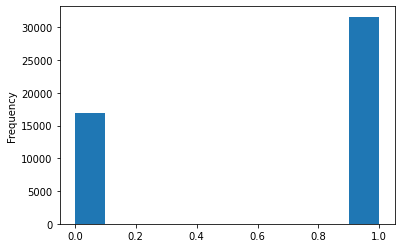

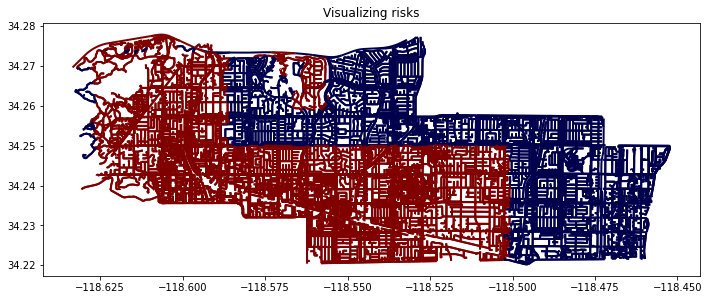

In [36]:
# STEP 2 - visualise different risk factors individually 

###  LIQ RISK SCORE ###

print("VISUALISE LIQ RISK")
edges_all['liq_risk_score'].plot.hist()

# visualising distance risk
utn = ox.settings.useful_tags_node
oxna = ox.settings.osm_xml_node_attrs
oxnt = ox.settings.osm_xml_node_tags
utw = ox.settings.useful_tags_way
oxwa = ox.settings.osm_xml_way_attrs
oxwt = ox.settings.osm_xml_way_tags
utn = list(set(utn + oxna + oxnt))
utw = list(set(utw + oxwa + oxwt))
ox.config(all_oneway=True, useful_tags_node=utn, useful_tags_way=utw)


fig, ax = plt.subplots(figsize=(10, 20))
# plot edges and nodes
edges_all.plot(ax=ax, linewidth=2, column='liq_risk_score', cmap='seismic')
sm = plt.cm.ScalarMappable(cmap='seismic', norm = matplotlib.colors.Normalize(vmin=edges_all['liq_risk_score'].min(), vmax=edges_all['liq_risk_score'].max()))
#sm.set_array([])
#fig.colorbar(sm, ax=ax)
ax.set_title('Visualizing risks')
fig.tight_layout()

In [42]:
# Liquifcation spread out between 0 and 1 , instead of discrete values

# # impute Nan values as 0
# values = {"liq_risk_score": 0}
# edges_all = edges_all.fillna(value=values)
# edges_all_copy = edges_all.copy()
# i =0

# def get_euclidean_distance(s,geom):
#     return ox.distance.euclidean_dist_vec(s.bounds[1],s.bounds[0],geom.bounds[1],geom.bounds[0])

# def get_avg_liq(s,edges_all_copy,i):
#   i = i +1
#   print("edges processed",i)
#   euc_distance_between_edges = edges_all_copy.geometry.apply(lambda x: get_euclidean_distance(s,x))
#   #print("nearest_edges",euc_distance_between_edges.sort_values().index.values[0:5])
  
#   # calculate average Liquifaction
#   collect_liq = []
#   for u,v,key in euc_distance_between_edges.sort_values().index.values[0:5]:
#     collect_liq.append(edges_all.loc[(u,v,key)]['liq_risk_score'])
  
#   avg_liq = sum(collect_liq) / len(collect_liq)
#   #print("avg liq", avg_liq)
#   return avg_liq

# edges_all['liq_risk_score_avg'] = edges_all.geometry.apply(lambda x:get_avg_liq(x,edges_all_copy,i))


# STEP 2 - visualise different risk factors individually 

# ###  LIQ RISK SCORE CONTINOUS ###

# print("VISUALISE LIQ RISK")
# edges_all['liq_risk_score_cont'].plot.hist()

# # visualising distance risk
# utn = ox.settings.useful_tags_node
# oxna = ox.settings.osm_xml_node_attrs
# oxnt = ox.settings.osm_xml_node_tags
# utw = ox.settings.useful_tags_way
# oxwa = ox.settings.osm_xml_way_attrs
# oxwt = ox.settings.osm_xml_way_tags
# utn = list(set(utn + oxna + oxnt))
# utw = list(set(utw + oxwa + oxwt))
# ox.config(all_oneway=True, useful_tags_node=utn, useful_tags_way=utw)


# fig, ax = plt.subplots(figsize=(10, 20))
# # plot edges and nodes
# edges_all.plot(ax=ax, linewidth=2, column='liq_risk_score_cont', cmap='seismic')
# sm = plt.cm.ScalarMappable(cmap='seismic', norm = matplotlib.colors.Normalize(vmin=edges_all['liq_risk_score_cont'].min(), vmax=edges_all['liq_risk_score_cont'].max()))
# #sm.set_array([])
# #fig.colorbar(sm, ax=ax)
# ax.set_title('Visualizing risks')
# fig.tight_layout()

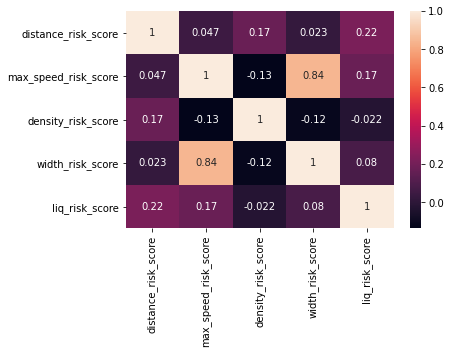

In [37]:
# STEP 3 - correlations between different risk factors
df = pd.DataFrame(edges_all,columns=['distance_risk_score','max_speed_risk_score','density_risk_score','width_risk_score','liq_risk_score'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='distance_risk_score', ylabel='distance_risk_score'>,
        <AxesSubplot:xlabel='max_speed_risk_score', ylabel='distance_risk_score'>,
        <AxesSubplot:xlabel='density_risk_score', ylabel='distance_risk_score'>,
        <AxesSubplot:xlabel='width_risk_score', ylabel='distance_risk_score'>,
        <AxesSubplot:xlabel='liq_risk_score', ylabel='distance_risk_score'>],
       [<AxesSubplot:xlabel='distance_risk_score', ylabel='max_speed_risk_score'>,
        <AxesSubplot:xlabel='max_speed_risk_score', ylabel='max_speed_risk_score'>,
        <AxesSubplot:xlabel='density_risk_score', ylabel='max_speed_risk_score'>,
        <AxesSubplot:xlabel='width_risk_score', ylabel='max_speed_risk_score'>,
        <AxesSubplot:xlabel='liq_risk_score', ylabel='max_speed_risk_score'>],
       [<AxesSubplot:xlabel='distance_risk_score', ylabel='density_risk_score'>,
        <AxesSubplot:xlabel='max_speed_risk_score', ylabel='density_risk_score'>,
        <AxesSubplot:xlabe

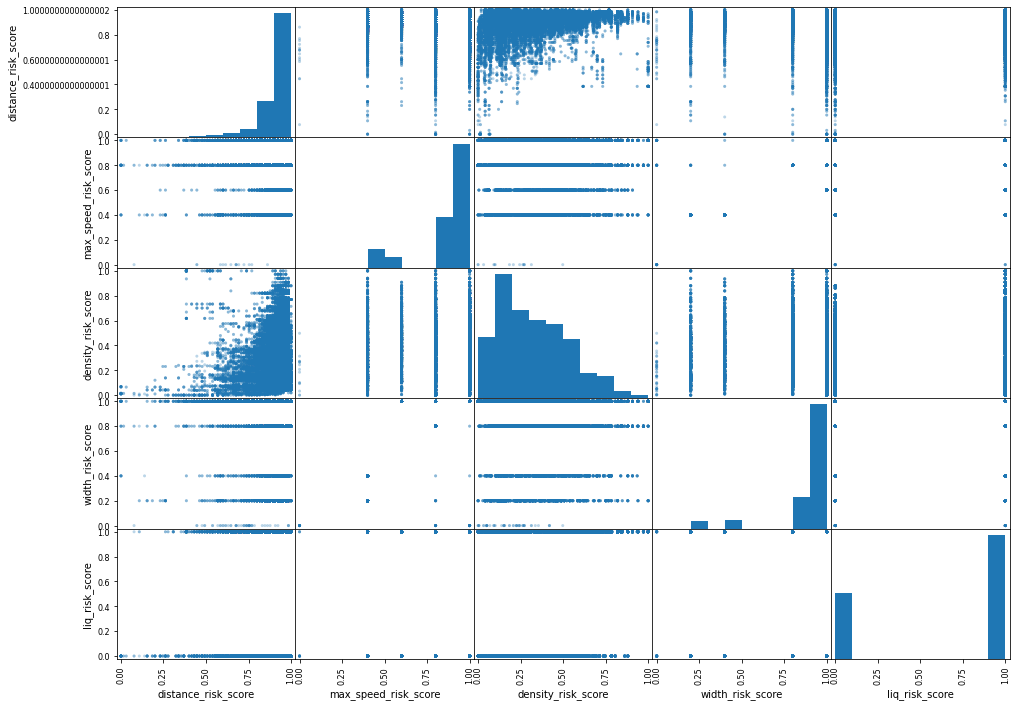

In [38]:
scatter_matrix(df,figsize=(16,12),alpha=0.3)

VISUALISE COMBINED RISK


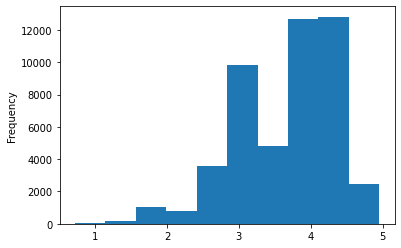

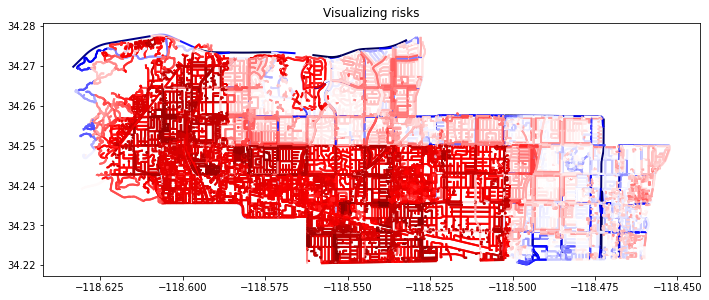

In [39]:
# STEP 4 - combine as it is

edges_all['combined_risk'] =  edges_all['distance_risk_score'] + edges_all['max_speed_risk_score'] + edges_all['density_risk_score'] + edges_all['width_risk_score'] + edges_all['liq_risk_score']
# 0 -5

print("VISUALISE COMBINED RISK")
edges_all['combined_risk'].plot.hist()

# visualising distance risk
utn = ox.settings.useful_tags_node
oxna = ox.settings.osm_xml_node_attrs
oxnt = ox.settings.osm_xml_node_tags
utw = ox.settings.useful_tags_way
oxwa = ox.settings.osm_xml_way_attrs
oxwt = ox.settings.osm_xml_way_tags
utn = list(set(utn + oxna + oxnt))
utw = list(set(utw + oxwa + oxwt))
ox.config(all_oneway=True, useful_tags_node=utn, useful_tags_way=utw)


fig, ax = plt.subplots(figsize=(10, 20))
# plot edges and nodes
edges_all.plot(ax=ax, linewidth=2, column='combined_risk', cmap='seismic')
sm = plt.cm.ScalarMappable(cmap='seismic', norm = matplotlib.colors.Normalize(vmin=edges_all['combined_risk'].min(), vmax=edges_all['combined_risk'].max()))
#sm.set_array([])
#fig.colorbar(sm, ax=ax)
ax.set_title('Visualizing risks')
fig.tight_layout()

VISUALISE COMBINED RISK


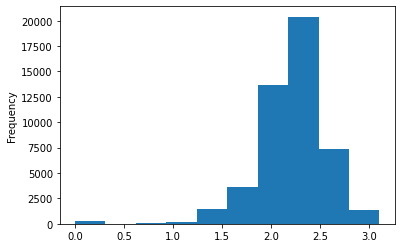

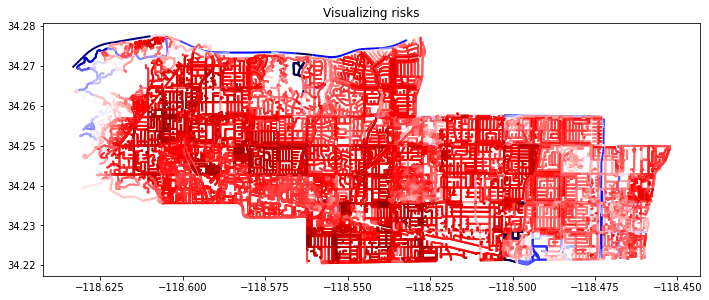

In [40]:
# STEP 5 - combine width and max speed as 1

edges_all['combined_risk'] =  edges_all['distance_risk_score'] + 0.5 * edges_all['max_speed_risk_score']  + 0.5 * edges_all['width_risk_score'] + 0.15 * edges_all['liq_risk_score'] + edges_all['density_risk_score']


# impute missing values with 0
values = {"combined_risk": 0}
edges_all = edges_all.fillna(value=values)

# 0 - 4

print("VISUALISE COMBINED RISK")
edges_all['combined_risk'].plot.hist()

# visualising distance risk
utn = ox.settings.useful_tags_node
oxna = ox.settings.osm_xml_node_attrs
oxnt = ox.settings.osm_xml_node_tags
utw = ox.settings.useful_tags_way
oxwa = ox.settings.osm_xml_way_attrs
oxwt = ox.settings.osm_xml_way_tags
utn = list(set(utn + oxna + oxnt))
utw = list(set(utw + oxwa + oxwt))
ox.config(all_oneway=True, useful_tags_node=utn, useful_tags_way=utw)


fig, ax = plt.subplots(figsize=(10, 20))
# plot edges and nodes
edges_all.plot(ax=ax, linewidth=2, column='combined_risk', cmap='seismic')
sm = plt.cm.ScalarMappable(cmap='seismic', norm = matplotlib.colors.Normalize(vmin=edges_all['combined_risk'].min(), vmax=edges_all['combined_risk'].max()))
#sm.set_array([])
#fig.colorbar(sm, ax=ax)
ax.set_title('Visualizing risks')
fig.tight_layout()

In [41]:
# STEP 4 - SAVE AS PICKLE FILE
all_graph_combined_risk = ox.graph_from_gdfs(nodes_all,edges_all)
nx.write_gpickle(all_graph_combined_risk,'/content/drive/My Drive/omdena/earthquake/2_all_graph_all_risk_added.pickle')